In [1]:
import os
import sys
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import measure as sm
from skimage.transform import rescale, resize

sys.path.append('../source/')

from data import *
from utils import *

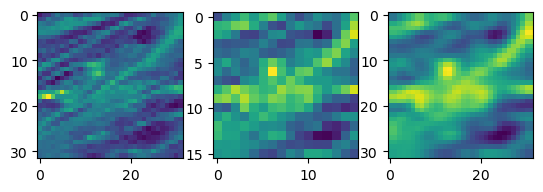

In [21]:
sample = np.load('../../data/set_baseline/ground_truth/MOD11A1.A2010273.h10v04.061.2021180083419_0_6.npy')
downsampled = resize(sample, (sample.shape[0]/2, sample.shape[1]/2))
upsampled = resize(downsampled, (sample.shape[0], sample.shape[1]))

fig, ax = plt.subplots(1, 3)
ax[0].imshow(sample)
ax[1].imshow(downsampled)
ax[2].imshow(upsampled)

In [27]:
print(np.mean(sample), np.mean(downsampled), np.mean(upsampled))
print(np.var(sample), np.var(downsampled), np.var(upsampled))

287.75619140624997 287.760008086671 287.7575562893986
2.537293697738647 1.5333515017870583 1.1248115568153607


**Create Dataset**

In [2]:
root = '../../data/super_baseline/'

In [ ]:
data_dir = os.path.join(root, 'ground_truth')
collection = pd.DataFrame(columns=['sample', 'ground_truth'])

for img_path in os.listdir(data_dir):
    img_name = os.path.splitext(os.path.basename(img_path))[0]
    sample_name = img_name + '_scaled'+'.npy'
    
    sample = np.load(os.path.join(data_dir, img_path))
    downsampled = resize(sample, (sample.shape[0]/2, sample.shape[1]/2))
    upsampled = resize(downsampled, (sample.shape[0], sample.shape[1]))

    np.save(os.path.join(root, 'samples', sample_name), upsampled)
    collection.loc[len(collection.index)] = [ 
        sample_name,
        img_path,
    ]  

In [31]:
collection.to_csv(os.path.join(root, 'collection.csv'))

In [33]:
assert len(collection) == len(os.listdir(data_dir))

In [4]:
dataset = LSTDataset(os.path.join(root, 'ground_truth'), os.path.join(root, 'samples'), os.path.join(root, 'collection.csv'))

In [10]:
for batch in dataset:
    sample, image = batch
    assert np.abs(np.mean(sample) - np.mean(image)) < 1, 'temp diff'